# Week 4 - Decision Tree and Random Forest

<img align="right" style="padding-right:10px;" src="figures_wk4/intro_tree.png" width=600><br>

**FTE Overview:**
Decision Tree vs Random Forest
* What is a Decision Tree?
* How is a tree structured?
* How does this algorithm work?
* What is CART?
* What are features of importance?
*  How is a random forest algorithm different?
*  What is bagging and feature randomness?
* Decision Tree Demo
   - Load the dataset
   - EDA: Looking for correlations
   - Split the dataset into training and test
   - DecisionTree Model
   - Model Evaluation
   - Visualization of the Tree
* Random Forest Demo
   - Load the dataset
   - Convert the target column to a binary value
   - Split the data set into training and testing models
   - Random Forest Model
   - Model Evaluation
   - Visualization of the Tree
*  Is it possible to optimize our  models 


## Decision Tree vs Random Forest
### What is a Decision Tree?
Decision trees are a type of model used for both classification and regression. Trees answer sequential questions which send us down a certain route of the tree given the answer. The model behaves with “if this than that” conditions ultimately yielding a specific result. This is easy to see with the image below which maps out whether or not to play golf.

<img align="center" style="padding-right:10px;" src="figures_wk4/decision_tree.png" width=500><br>

The flow of this tree works downward beginning at the top with the outlook. The outlook has one of three options: sunny, overcast, or rainy. If sunny, we travel down to the next level. Will it be windy? True or false? If true, we choose not to play golf that day. If false we choose to play. If the outlook was changed to overcast, we would end there and decide to play. If the outlook was rainy, we would then look at the humidity. If the humidity was high we would not play, if the humidity is normal we would play.

### How is a tree structured?
The top of the tree (or bottom depending on how you look at it) is called the **root node**. **Intermediate nodes** have arrows pointing to and away from them. Finally, the nodes at the bottom of the tree without any edges pointing away from them are called **leaves**. Leaves tell you what class each sample belongs to.

Tree depth is another important concept. This represents how many questions are asked before we reach our predicted classification. We can see that the deepest the tree gets in the example above is two. The sunny and rainy routes both have a depth of two. The overcast route only has a depth of one, although the overall tree depth is denoted by its longest route. Thus, this tree has a depth of two.

### How does this algorithm work?
The algorithm creates a multi-way tree — each node can have two or more edges — finding the categorical feature that will maximize the information gain using the impurity criterion entropy. Not only can it not handle numerical features, it is only appropriate for classification problems.

Advantages of Decision Tree Algorithm:
* Understandable prediction rules are created from the training data
* Builds the fastest tree
* Builds a short tree
* Only need enough attributes until all data is classified
* Finding leaf nodes enable test data to be pruned, reducing number of tests
* Whole dataset is searched to create tree

Disadvantages of Decision Tree Algorithm:
* Data may be over-fitted or over-classified, if a small sample is tested
* Only one attribute at a time is tested for making a decision
* Does not handle numeric attributes and missing values

### What is CART?
CART stands for Classification and Regression Trees. The algorithm creates a binary tree — each node has exactly two outgoing edges — finding the best numerical or categorical feature to split using an appropriate impurity criterion. For classification, Gini impurity or twoing criterion can be used. For regression, CART introduced variance reduction using least squares (mean square error).

Advantages of CART:
* CART can easily handle both numerical and categorical variables
* CART algorithm will itself identify the most significant variables and eliminate non-significant ones
* CART can easily handle outliers

Disadvantages of CART:
* CART may have unstable decision tree
* CART splits by one by one variable

### What are features of importance?
In decision trees, every node is a condition of how to split values in a single feature, so that similar values of the dependent variable end up in the same set after the split. The condition is based on impurity, which in case of classification problems is Gini impurity/information gain (entropy), while for regression trees its variance. So when training a tree we can compute how much each feature contributes to decreasing the weighted impurity.

### How is a random forest algorithm different?
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

<img align="center" style="padding-right:10px;" src="figures_wk4/random_forest.png" width=400><br>

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is that a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The random forest is a classification algorithm consisting of many decisions trees. It uses **bagging** and **feature randomness** when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

### What is bagging and feature randomness?
So how does random forest ensure that the behavior of each individual tree is not too correlated with the behavior of any of the other trees in the model? It uses the following two methods:

**Bagging (Bootstrap Aggregation)** — Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures. Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.

**Feature Randomness** — In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.

References: <br>
https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991 <br>
https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93 <br>
https://www.geeksforgeeks.org/decision-tree-introduction-example/?ref=rp <br>
https://towardsdatascience.com/understanding-random-forest-58381e0602d2

### Decision Tree Demo
Let's take a look at how the Decision Tree algorithm works. For this we will be using the [UCI Balance Scale Weight & Distance dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/)

**Dataset Description:**
This data set was generated to model psychological experimental results.  Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced.  The attributes are the left weight, the left  distance, the right weight, and the right distance.  The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight).  If they are equal, it is balanced.

* Class Name: 3 (L, B, R)
* Left-Weight: 5 (1, 2, 3, 4, 5)
* Left-Distance: 5 (1, 2, 3, 4, 5)
* Right-Weight: 5 (1, 2, 3, 4, 5)
* Right-Distance: 5 (1, 2, 3, 4, 5)

In [3]:
# get all the import stuff taken care of

#general stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# plotting
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Load the dataset

In [2]:
balance = pd.read_csv('data_wk4/balance-scale.data')

In [3]:
balance.head(10)

B  1  1.1  1.2  1.3
0  R  1    1    1    2
1  R  1    1    1    3
2  R  1    1    1    4
3  R  1    1    1    5
4  R  1    1    2    1
5  R  1    1    2    2
6  R  1    1    2    3
7  R  1    1    2    4
8  R  1    1    2    5
9  R  1    1    3    1

In [4]:
balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   B       624 non-null    object
 1   1       624 non-null    int64 
 2   1.1     624 non-null    int64 
 3   1.2     624 non-null    int64 
 4   1.3     624 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [5]:
balance.describe(include='all')

B           1         1.1         1.2         1.3
count   624  624.000000  624.000000  624.000000  624.000000
unique    3         NaN         NaN         NaN         NaN
top       R         NaN         NaN         NaN         NaN
freq    288         NaN         NaN         NaN         NaN
mean    NaN    3.003205    3.003205    3.003205    3.003205
std     NaN    1.414210    1.414210    1.414210    1.414210
min     NaN    1.000000    1.000000    1.000000    1.000000
25%     NaN    2.000000    2.000000    2.000000    2.000000
50%     NaN    3.000000    3.000000    3.000000    3.000000
75%     NaN    4.000000    4.000000    4.000000    4.000000
max     NaN    5.000000    5.000000    5.000000    5.000000

Looks like our dataset is very clean data wise, but we should address the column names.

In [6]:
col_names = ['class', 'left_weight','left_distance','right_weight','right_distance']

In [7]:
balance.columns = col_names

In [8]:
balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class           624 non-null    object
 1   left_weight     624 non-null    int64 
 2   left_distance   624 non-null    int64 
 3   right_weight    624 non-null    int64 
 4   right_distance  624 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


#### EDA: Looking for correlations

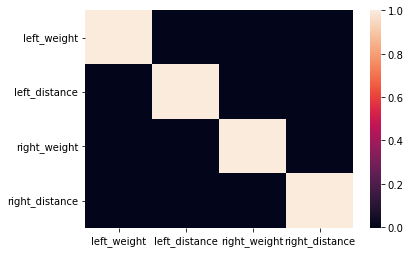

In [9]:
_ = sns.heatmap(balance.corr())

Well, that's a bit disappointing!  However, we are going to continue on...

#### Split the dataset into training and test

In [10]:
#gather up names of all the columns
cols = balance.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'class'
feature_cols = [c for c in cols if c != prediction_col]

x = balance[feature_cols].values
y = balance[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

#### DecisionTree Model

In [11]:
# establish and fit the model using DecisonTree()
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
preds = tree_model.predict(x_test)

In [12]:
#display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
['L' 'L' 'L' 'L' 'L' 'L' 'B' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'B' 'L'
 'R' 'R' 'R' 'L' 'R' 'B' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'B' 'R'
 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'B' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R'
 'B' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'B' 'R' 'L' 'L' 'R' 'R' 'L'
 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'B' 'B' 'L']
Predictions for test data set
['L' 'L' 'L' 'L' 'L' 'B' 'R' 'L' 'L' 'R' 'B' 'L' 'L' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'B' 'R' 'R' 'B' 'R' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'B' 'L' 'R' 'B' 'L' 'R' 'R' 'R' 'R' 'L' 'L'
 'R' 'B' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'R' 'L' 'R' 'B' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R'
 'R' 'L' 'L' 'B' 'R' 'B' 'B' 'B' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'L

Let's see how well our Decision Tree model did at predicting the 'class'.  

We will check the distribution of the target within our test set first.

R    62
L    54
B     9
dtype: int64


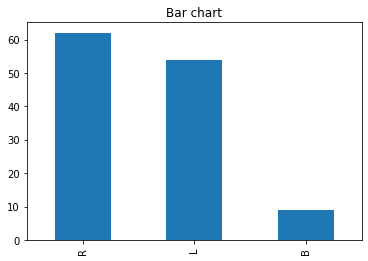

In [13]:
test_by_quality=pd.value_counts(y_test, sort= True)
test_by_quality.plot(kind= 'bar')
plt.title('Bar chart')

print(test_by_quality)

Now, let's take a look at the distribution of the predictions from our model.

R    57
L    56
B    12
dtype: int64


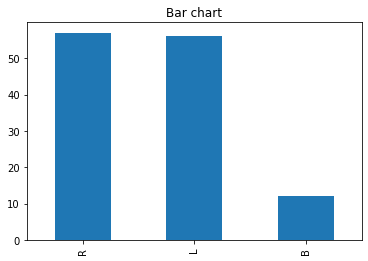

In [14]:
preds_by_quality=pd.value_counts(preds, sort= True)
preds_by_quality.plot(kind= 'bar')
plt.title('Bar chart')

print(preds_by_quality)

Hmmmm...  At first glance, it would appear that our model did a fairly good job!!!

#### Model Evaluation
Let's take a look at a confusion matrix.

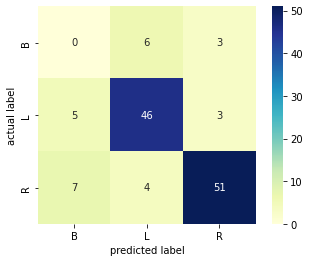

In [15]:
# make a confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

<div class="alert alert-block alert-success">
<b>Pop Quiz::</b> Can you identify the False Positives and False Nagatives in the confusion matrix?
    
**Answer:** <br>
Generally speaking, the False Positives are located above the diagonal and the False Negatives are located below the diagonal line. However, you have to take into consideration where you are in your confusion matrix. Take a look at the graphic from [this stackoverflow post](https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal)

<img align="center" style="padding-right:10px;" src="figures_wk4/confusion_matrix.png" width=400><br>

</div>

Now let's take a look at the accuracy of our model.

In [16]:
#using the sklearn.metrics package to determine the accuracy of the model
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,preds))

0.776


Now let's take a look at the features of importance in our model. 

In [17]:
# display the importance features

importance_list = list(zip(feature_cols,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature


[('left_distance', 0.28948721272215827),
 ('right_weight', 0.24228566641941995),
 ('right_distance', 0.2396262382485684),
 ('left_weight', 0.22860088260985337)]

Well, this isn't all that surprising since the correlation matrix showed that all of our features had roughly the same correlation to each other.  But you get the idea of how to pull this information.

#### Visualization of the Tree

In [18]:
!pip install pydotplus

In [1]:
#for Windows users
#install graphviz with conda and then add to your path
import os     
os.environ["PATH"] += os.pathsep + 'D:\\Anaconda3\\Library\\bin\\graphviz'


In [2]:
# Visualize data 

import pydotplus
#from sklearn import tree (already imported)
import collections

dot_data = tree.export_graphviz(tree_model,
                                feature_names=feature_cols,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('images_wk4/decisiontree.png')

NameError: name 'tree' is not defined

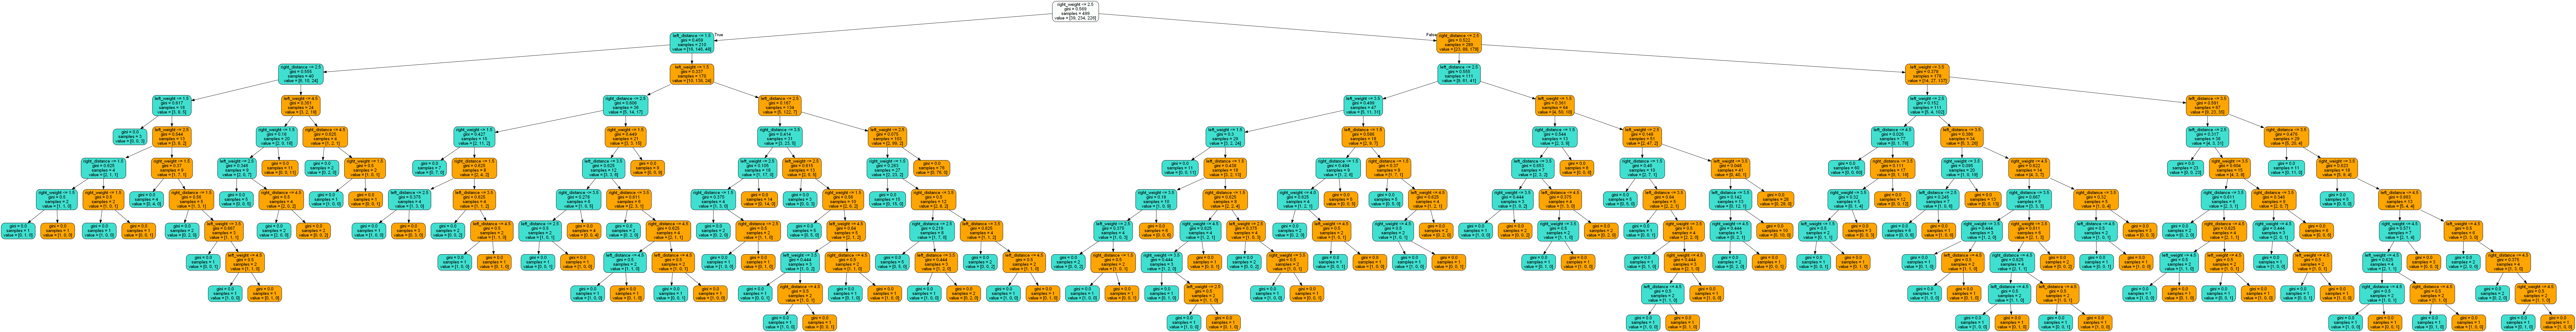

In [21]:
#display the png here
from IPython.display import Image

Image(filename='images_wk4/decisiontree.png') 

### Random Forest Demo
Now we will switch gears and take a look at a example of a Random Forest.  For this exercise we will use our heart disease cleaned dataset.  

#### Load the dataset

In [22]:
heart = pd.read_csv('data_wk4/heart.disease.data.clean.csv')

In [23]:
heart.head(10)

age  sex  cp  trestbps  chol  cigs  years  fbs  famhist  restecg  thalach  \
0   63    1   1       145   233  50.0   20.0    1        1        2      150   
1   67    1   4       160   286  40.0   40.0    0        1        2      108   
2   67    1   4       120   229  20.0   35.0    0        1        2      129   
3   37    1   3       130   250   0.0    0.0    0        1        0      187   
4   41    0   2       130   204   0.0    0.0    0        1        2      172   
5   56    1   2       120   236  20.0   20.0    0        1        0      178   
6   62    0   4       140   268   0.0    0.0    0        1        2      160   
7   57    0   4       120   354   0.0    0.0    0        1        0      163   
8   63    1   4       130   254   0.0    0.0    0        0        2      147   
9   53    1   4       140   203  20.0   25.0    1        1        2      155   

   exang  thal  num  
0      0     6    0  
1      1     3    2  
2      1     7    1  
3      0     3    0  
4      0     3    0  
5      0     3    0  
6      0     3    3  
7      1     3    0  
8      0     7    2  
9      1     7    1

In [24]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      282 non-null    float64
 6   years     282 non-null    float64
 7   fbs       282 non-null    int64  
 8   famhist   282 non-null    int64  
 9   restecg   282 non-null    int64  
 10  thalach   282 non-null    int64  
 11  exang     282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 31.0 KB


In [25]:
heart.describe(include='all')

age         sex          cp    trestbps        chol        cigs  \
count  282.000000  282.000000  282.000000  282.000000  282.000000  282.000000   
mean    54.411348    0.677305    3.163121  131.195035  247.705674   16.836011   
std      9.053083    0.468338    0.955405   16.739821   46.178771   18.876755   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  213.000000    0.000000   
50%     55.000000    1.000000    3.000000  130.000000  244.000000   11.976385   
75%     61.000000    1.000000    4.000000  140.000000  277.000000   30.000000   
max     77.000000    1.000000    4.000000  170.000000  360.000000   75.000000   

            years         fbs     famhist     restecg     thalach       exang  \
count  282.000000  282.000000  282.000000  282.000000  282.000000  282.000000   
mean    15.347364    0.148936    0.620567    1.014184  149.826241    0.326241   
std     15.276814    0.356658    0.486108    0.998118   22.737594    0.469670   
min      0.000000    0.000000    0.000000    0.000000   88.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  133.250000    0.000000   
50%     15.000000    0.000000    1.000000    2.000000  153.500000    0.000000   
75%     30.000000    0.000000    1.000000    2.000000  165.750000    1.000000   
max     54.000000    1.000000    1.000000    2.000000  202.000000    1.000000   

             thal         num  
count  282.000000  282.000000  
mean     4.677305    0.907801  
std      1.936386    1.224894  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

Overall the dataset looks fairly clean.  Which is good because this is supposed to the the "cleaned" version of the data.  

However, I am going to adjust some of the column names.

In [26]:
# using the column names from Dr. George's R demo
col_names = ['age',
                'sex',
                'chest.pain.type',
                'resting.blood.pressure',
                'cholesterol',
                'num.cigs.per.day',
                'years.as.smoker',
                'fasting.blood.sugar',
                'family.history.heart.disease',
                'resting.ecg.results',
                'max.heart.rate.exercise',
                'exercise.induced.angina',
                'blood.disorder', 
                'heart.disease']

In [27]:
heart.columns = col_names

#### Convert the target column to a binary value

In [28]:
# Convert heart disease column to 0/1
heart['heart.disease'] = (heart['heart.disease']>0).astype(int)

In [29]:
heart.head()

age  sex  chest.pain.type  resting.blood.pressure  cholesterol  \
0   63    1                1                     145          233   
1   67    1                4                     160          286   
2   67    1                4                     120          229   
3   37    1                3                     130          250   
4   41    0                2                     130          204   

   num.cigs.per.day  years.as.smoker  fasting.blood.sugar  \
0              50.0             20.0                    1   
1              40.0             40.0                    0   
2              20.0             35.0                    0   
3               0.0              0.0                    0   
4               0.0              0.0                    0   

   family.history.heart.disease  resting.ecg.results  max.heart.rate.exercise  \
0                             1                    2                      150   
1                             1                    2                      108   
2                             1                    2                      129   
3                             1                    0                      187   
4                             1                    2                      172   

   exercise.induced.angina  blood.disorder  heart.disease  
0                        0               6              0  
1                        1               3              1  
2                        1               7              1  
3                        0               3              0  
4                        0               3              0

#### Split the data set into training and testing models

In [93]:
import random
from random import randint
value = np.random.randint(100, size=282)
#1 and 10 represent the range for your random value
print(value)

[47 11 87 61 88  8 25 94 30 72 20 32 38 62 95 86 17 28  7 71 11 62 31 72
 54  3  7 19 54 84 90 83 64 36 80 31 93  6 14 25  4 26 43 32  2 59 36  2
 53 21 13  8 73  8 54 23 83 19 67 60 16 61 21 86 87 91  7 73 18 73 47 66
 74 31 38 76 16 56  2 94 89  3 56 55 16 85 15  6 47 77  0 74 93 82 66 45
 46 98 65 44 39 54 51 96 33 25 42 98 39 46 84 61 50 96 13  6  4 10 57 81
 22 52 91 43 74  4 59 70 61 20 97  9 65 27 88 17 69 79 15 42 11 20 38  4
 61 68 79  0 47 50 96 14 89 60 78 80 40 28 47 68 48 64 23 61 55 36 10 23
 92 85  5 33 98 66 78 99 70 95 89 87  5 84 43 78 84 47 16  3 18 34 57 76
 77 71 37 45 85 48  7 16  8 93 60 21 95 45 14 34 35  1 52 51 59 58 44 41
 45 22 85 39 19 43 45 68 84 33 88 49 67 24  0 73 80 67 92 80  3 60 53 76
 74 78  0 11  0 21  1 97 13 29 67 77 41 30 20  6 20 56 20 72 40 38 32 82
 48 63 96 31 86 18 94 35 51 13 86 66 95 83 24 19 99 32]


In [94]:
heart.assign(value = np.random.randint(100, size=282))

age  sex  chest.pain.type  resting.blood.pressure  cholesterol  \
0     63    1                1                     145          233   
1     67    1                4                     160          286   
2     67    1                4                     120          229   
3     37    1                3                     130          250   
4     41    0                2                     130          204   
..   ...  ...              ...                     ...          ...   
277   39    0                3                     138          220   
278   57    1                2                     154          232   
279   58    0                4                     130          197   
280   57    1                4                     110          335   
281   47    1                3                     130          253   

     num.cigs.per.day  years.as.smoker  fasting.blood.sugar  \
0                50.0             20.0                    1   
1                40.0             40.0                    0   
2                20.0             35.0                    0   
3                 0.0              0.0                    0   
4                 0.0              0.0                    0   
..                ...              ...                  ...   
277              20.0             23.0                    0   
278              40.0             35.0                    0   
279               0.0              0.0                    0   
280              20.0             15.0                    0   
281               0.0              0.0                    0   

     family.history.heart.disease  resting.ecg.results  \
0                               1                    2   
1                               1                    2   
2                               1                    2   
3                               1                    0   
4                               1                    2   
..                            ...                  ...   
277                             0                    0   
278                             1                    2   
279                             1                    0   
280                             1                    0   
281                             1                    0   

     max.heart.rate.exercise  exercise.induced.angina  blood.disorder  \
0                        150                        0               6   
1                        108                        1               3   
2                        129                        1               7   
3                        187                        0               3   
4                        172                        0               3   
..                       ...                      ...             ...   
277                      152                        0               3   
278                      164                        0               3   
279                      131                        0               3   
280                      143                        1               7   
281                      179                        0               3   

     heart.disease  value  
0                0     97  
1                1     92  
2                1     34  
3                0     56  
4                0     18  
..             ...    ...  
277              0     66  
278              1     80  
279              0     67  
280              1     14  
281              0     51  

[282 rows x 15 columns]

In [ ]:
heart1= heart.assign(value = np.random.randint(100, size=282))
                                        

In [75]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           282 non-null    int64  
 1   sex                           282 non-null    int64  
 2   chest.pain.type               282 non-null    int64  
 3   resting.blood.pressure        282 non-null    int64  
 4   cholesterol                   282 non-null    int64  
 5   num.cigs.per.day              282 non-null    float64
 6   years.as.smoker               282 non-null    float64
 7   fasting.blood.sugar           282 non-null    int64  
 8   family.history.heart.disease  282 non-null    int64  
 9   resting.ecg.results           282 non-null    int64  
 10  max.heart.rate.exercise       282 non-null    int64  
 11  exercise.induced.angina       282 non-null    int64  
 12  blood.disorder                282 non-null    int64  
 13  heart

In [76]:
type(res)

int

In [78]:
#gather up names of all the columns
cols = heart1.columns
print(cols)

Index(['age', 'sex', 'chest.pain.type', 'resting.blood.pressure',
       'cholesterol', 'num.cigs.per.day', 'years.as.smoker',
       'fasting.blood.sugar', 'family.history.heart.disease',
       'resting.ecg.results', 'max.heart.rate.exercise',
       'exercise.induced.angina', 'blood.disorder', 'heart.disease', 'res'],
      dtype='object')


In [79]:

#set the prediction column and the feature columns for KNN
prediction_col = 'heart.disease'
feature_cols = [c for c in cols if c != prediction_col]

x = heart1[feature_cols].values
y = heart1[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

#### Random Forest Model

In [80]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_jobs = -1, random_state=41)
forest_model.fit(x_train,y_train)

#gathering the predictions
forest_preds = forest_model.predict(x_test)

In [81]:
#display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(forest_preds)

Actuals for test data set
[0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1]
Predictions for test data set
[0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0]


#### Model Evaluation

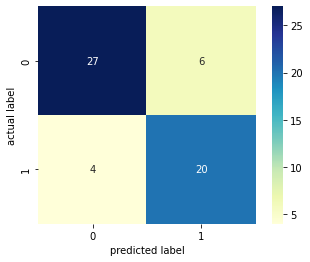

In [82]:
# make a confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest_preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [83]:
#using the sklearn.metrics package to determine the accuracy of the model
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,forest_preds))

0.8245614035087719


In [84]:
# display the importance features with our tree

importance_list = list(zip(feature_cols,forest_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('blood.disorder', 0.1434154686608775),
 ('chest.pain.type', 0.14284998245698743),
 ('max.heart.rate.exercise', 0.13952916350918415),
 ('age', 0.10487790408353859),
 ('cholesterol', 0.09986527208425203),
 ('resting.blood.pressure', 0.08778680648605522),
 ('years.as.smoker', 0.059832851952015785),
 ('num.cigs.per.day', 0.058419987438670384),
 ('exercise.induced.angina', 0.0580556095620457),
 ('sex', 0.04679382572356876),
 ('resting.ecg.results', 0.024106976715340806),
 ('family.history.heart.disease', 0.021069574269701286),
 ('fasting.blood.sugar', 0.013396577057762482),
 ('res', 0.0)]

In [85]:
max_feature_len = len(max(feature_cols, key=len))

In [86]:
for feature, rank in sorted_import_feature:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

blood.disorder: .............. 14.34%
chest.pain.type: ............. 14.28%
max.heart.rate.exercise: ..... 13.95%
age: ......................... 10.49%
cholesterol: ................. 9.99%
resting.blood.pressure: ...... 8.78%
years.as.smoker: ............. 5.98%
num.cigs.per.day: ............ 5.84%
exercise.induced.angina: ..... 5.81%
sex: ......................... 4.68%
resting.ecg.results: ......... 2.41%
family.history.heart.disease:  2.11%
fasting.blood.sugar: ......... 1.34%
res: ......................... 0.00%


#### Visualization of the Tree

In [38]:
!pip install graphviz

In [39]:
from sklearn.tree import export_graphviz

estimator= forest_model.estimators_[50] #extract one tree to test
features = col_names[:-1]

In [40]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [41]:
# Convert to png using system command
from subprocess import call
call (['dot', '-Tpng', 'tree.dot', '-o', 'images_wk4/tree.png', '-Gdpi=600'])

0

In [42]:
# Display in notebook
from IPython.display import Image
Image(filename='images_wk4/tree.png')

### Is it possible to optimize our  models 
[sklearn GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
is a great way to optimize both a DecisionTree and a RandomForest model. I'll leave this exercise for the reader to investigate.